# SVM RBF IRIS

## Importation des libs :

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Chargement de la base de données iris et traitement :

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()

# Select the first two features for visualization
X = iris.data[:, :2]  # Only the first two features
y = iris.target  # Target labels

# Normalize the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize features to have mean=0 and variance=1

## Séparation en train/test

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% entraînement, 20% test

## Entraînement du SVM avec noyau RBF

In [6]:
svm = SVC(kernel='rbf', C=10, gamma=1)
svm.fit(X_train, y_train)

SVC(C=10, gamma=1)

## Evaluation du modèle et matrice de confusion

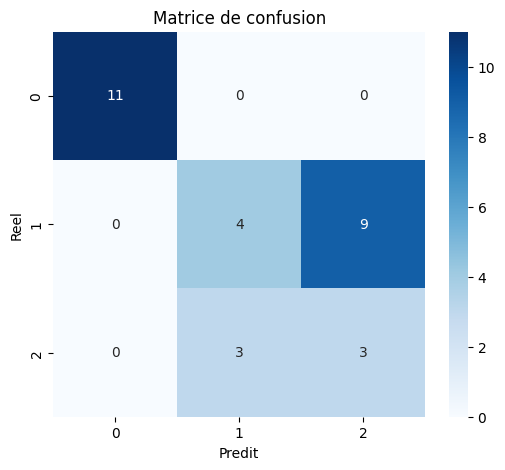

In [7]:

y_pred = svm.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predit')
plt.ylabel('Reel')
plt.title('Matrice de confusion')
plt.show()

## Affichage des frontières de décisions


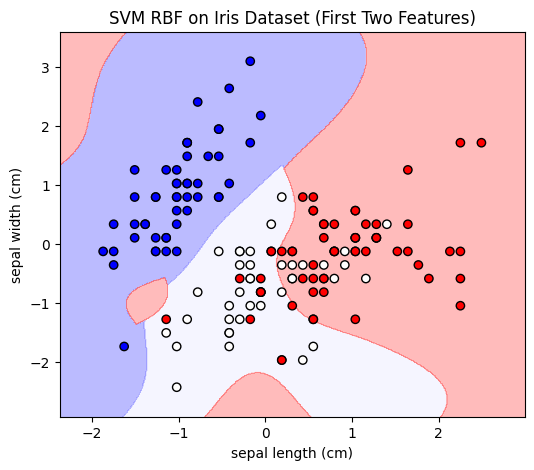

In [8]:

def afficher_frontiere_decision(X, y, model, feature_names):
    """Plot the decision boundary of the SVM model."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM RBF on Iris Dataset (First Two Features)")
    plt.show()


afficher_frontiere_decision(X, y, svm, iris.feature_names[:2])

## Essai avec autres paramètres

Test avec C=0.1, gamma=0.01


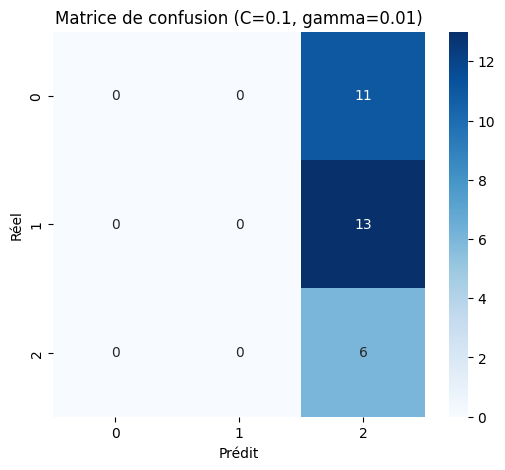

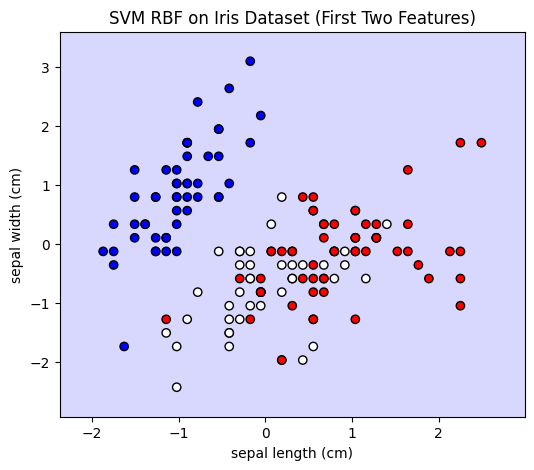

Test avec C=0.1, gamma=0.1


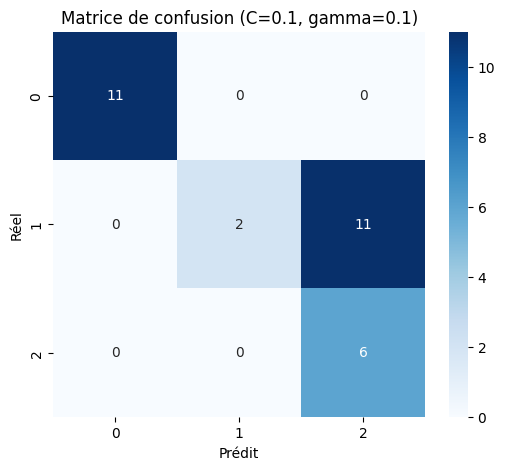

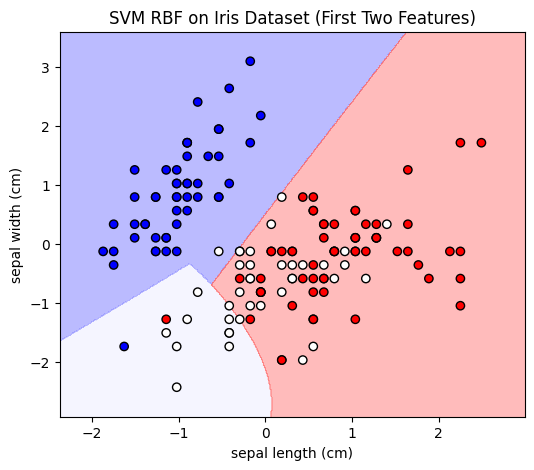

Test avec C=0.1, gamma=1


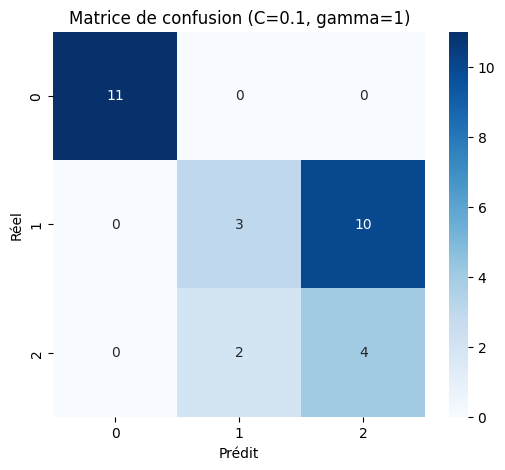

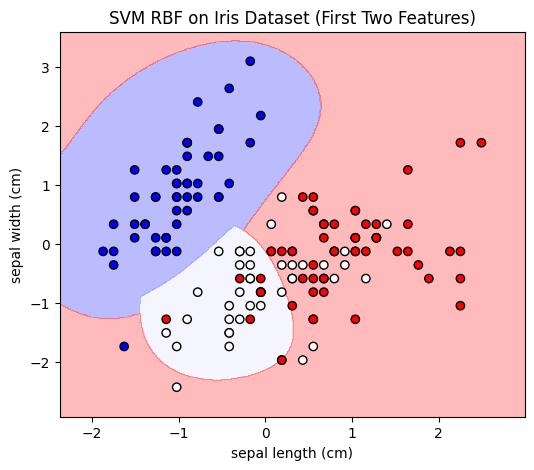

Test avec C=0.1, gamma=10


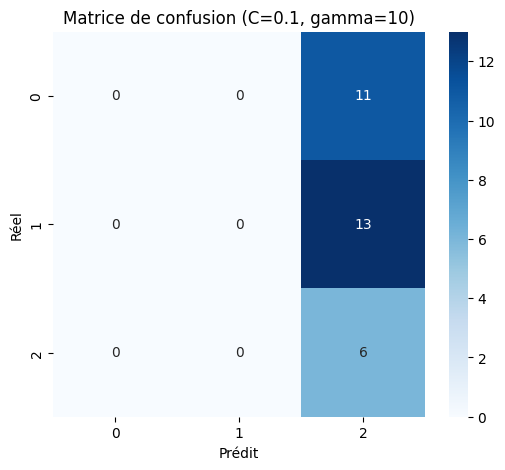

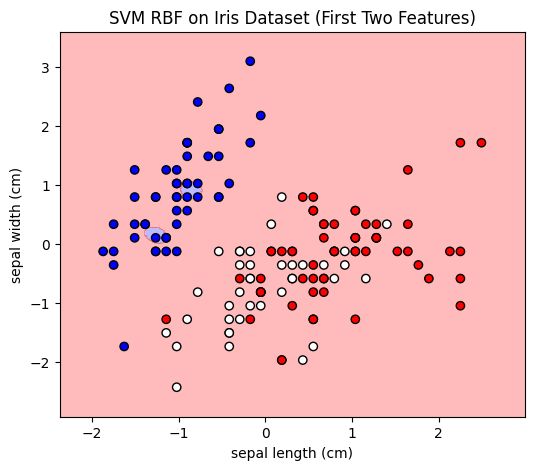

Test avec C=1, gamma=0.01


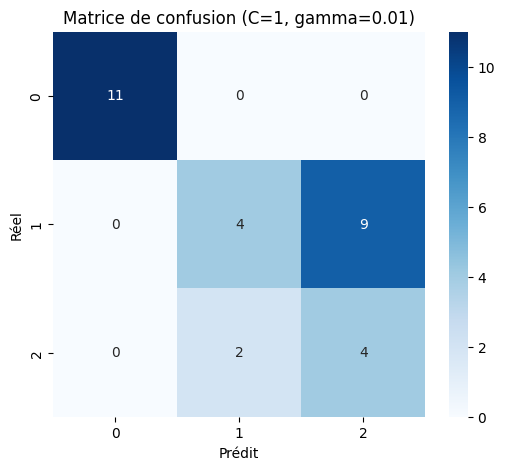

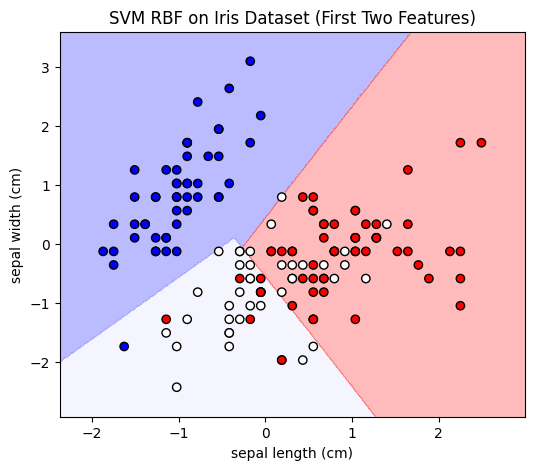

Test avec C=1, gamma=0.1


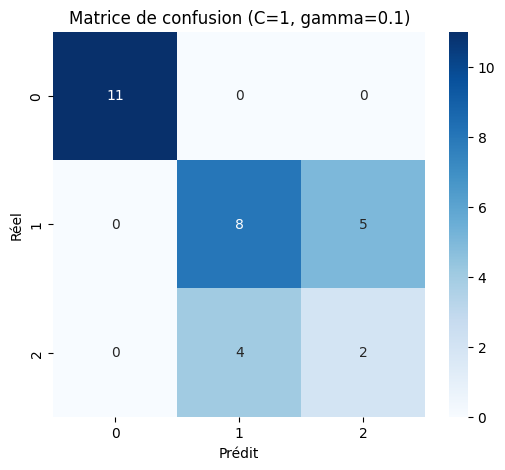

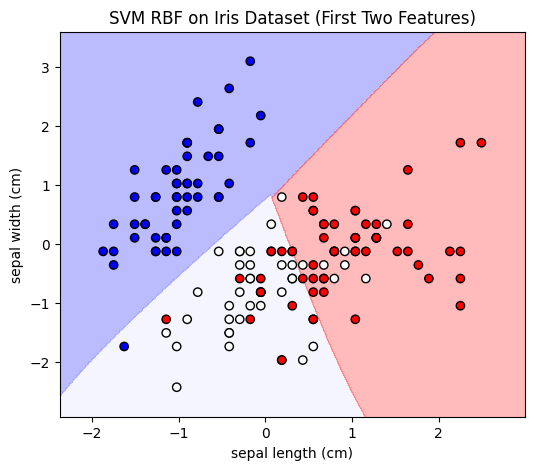

Test avec C=1, gamma=1


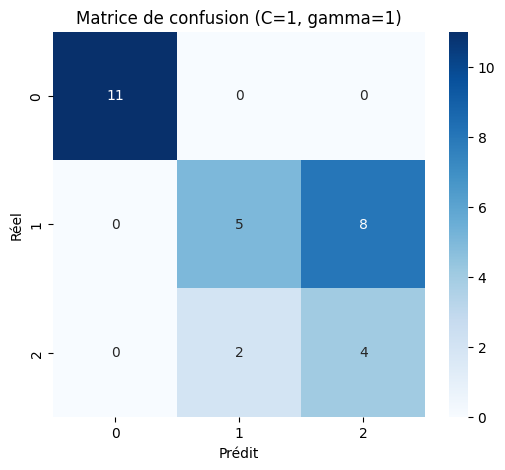

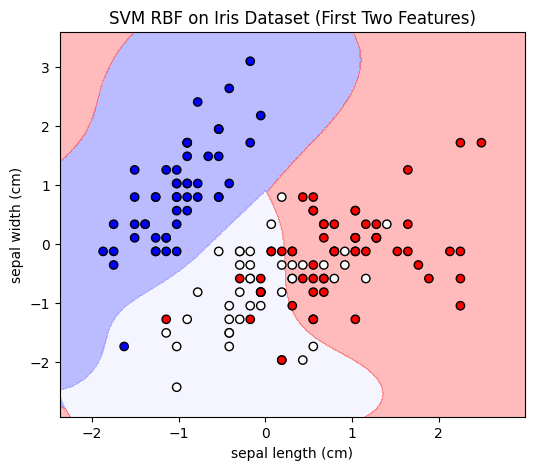

Test avec C=1, gamma=10


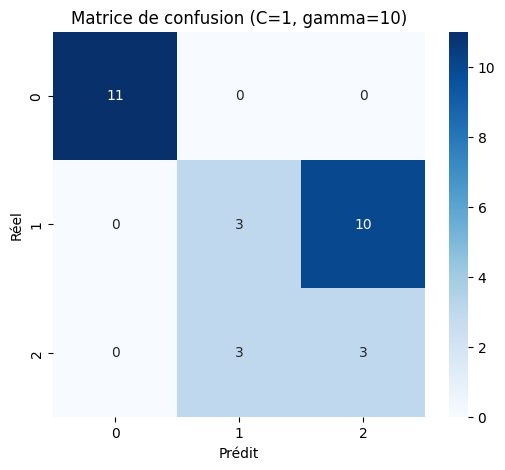

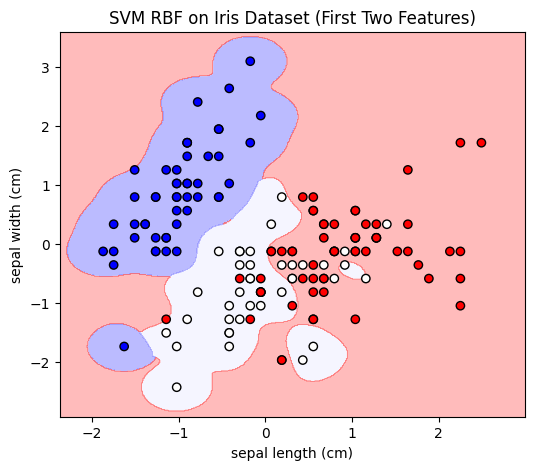

Test avec C=10, gamma=0.01


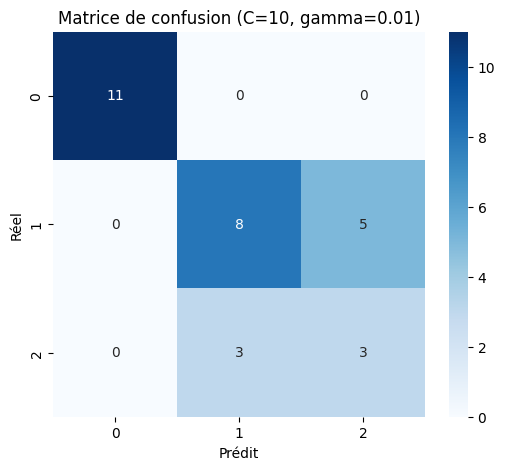

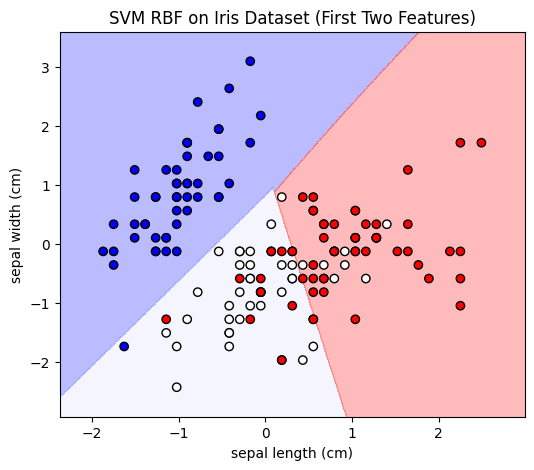

Test avec C=10, gamma=0.1


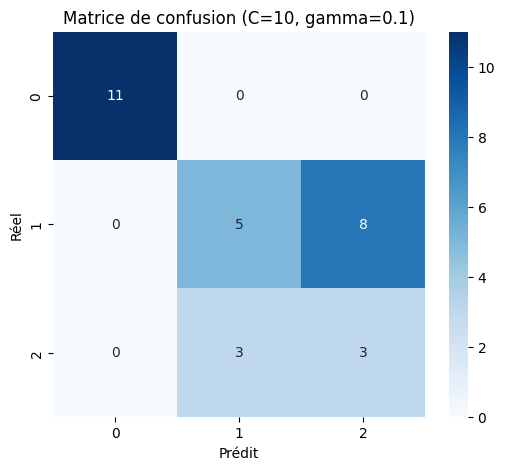

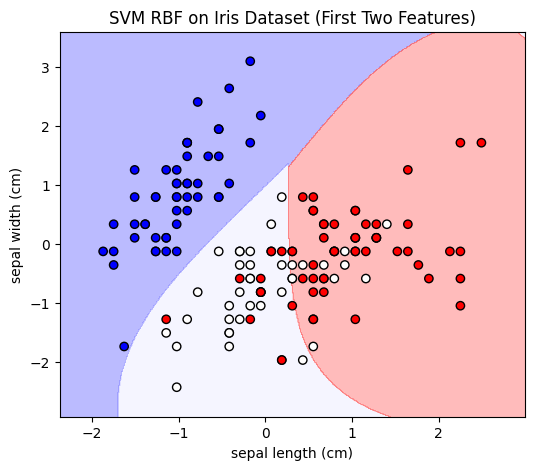

Test avec C=10, gamma=1


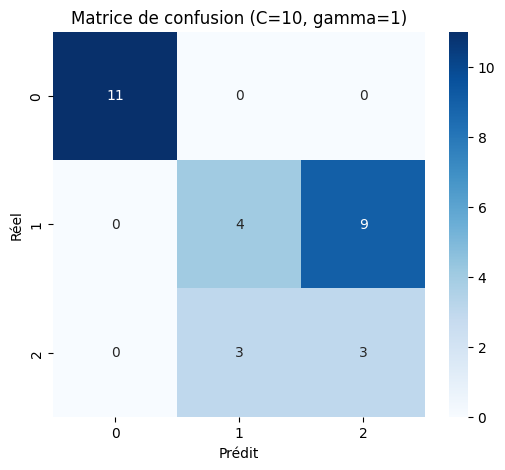

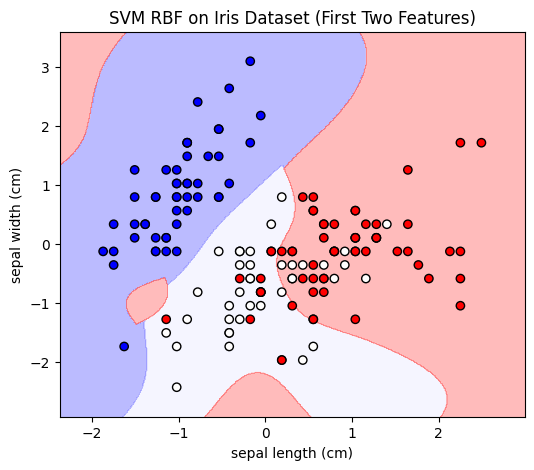

Test avec C=10, gamma=10


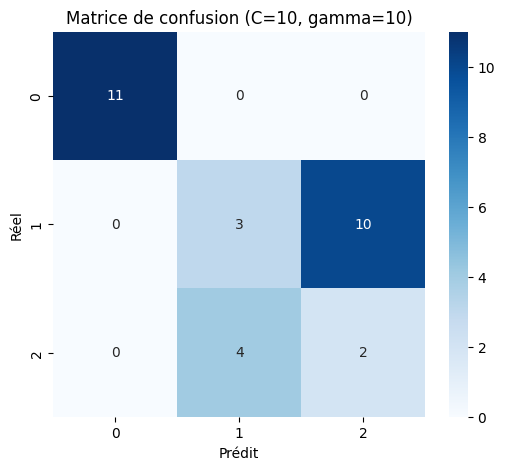

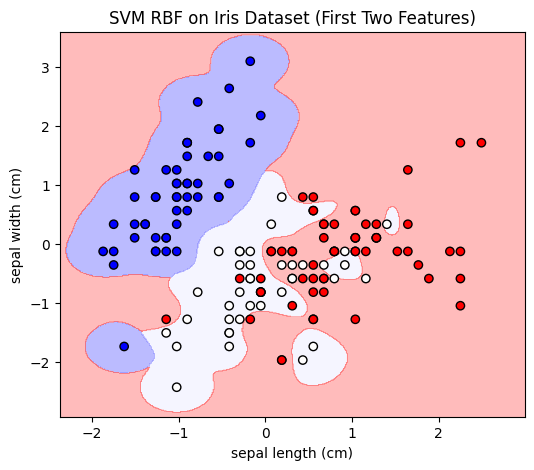

Test avec C=100, gamma=0.01


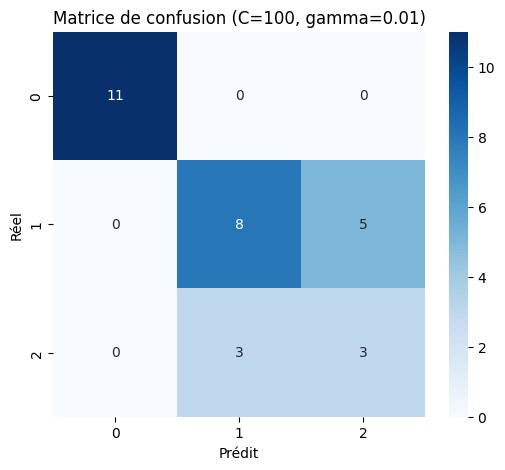

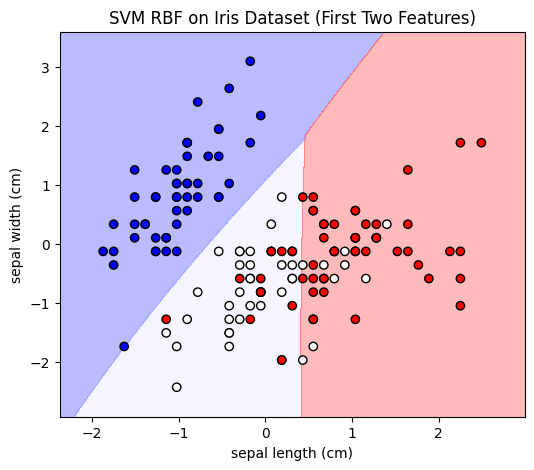

Test avec C=100, gamma=0.1


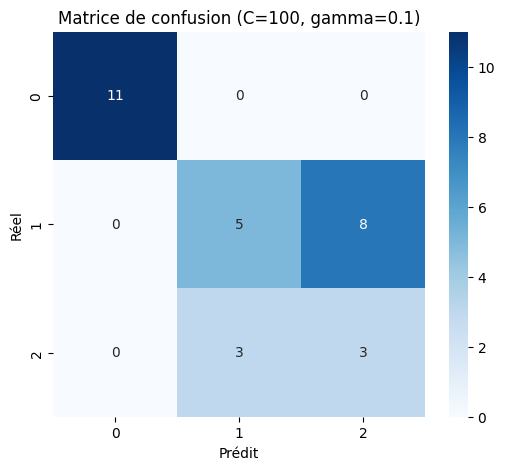

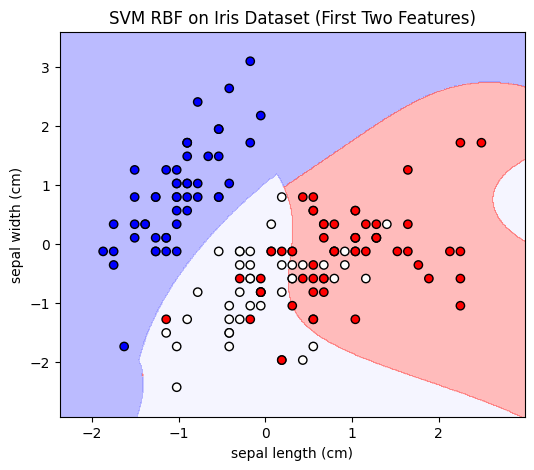

Test avec C=100, gamma=1


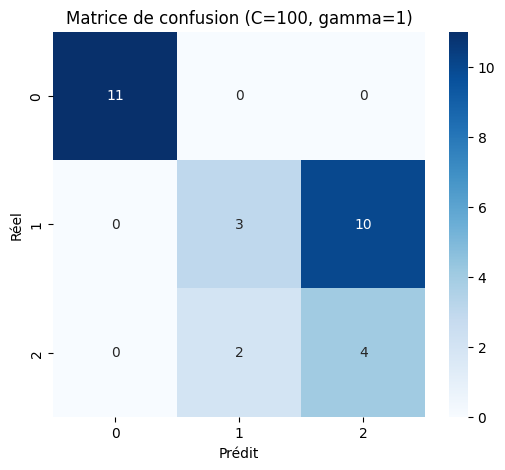

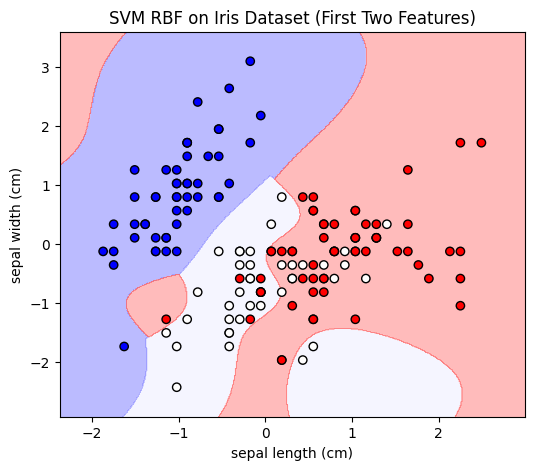

Test avec C=100, gamma=10


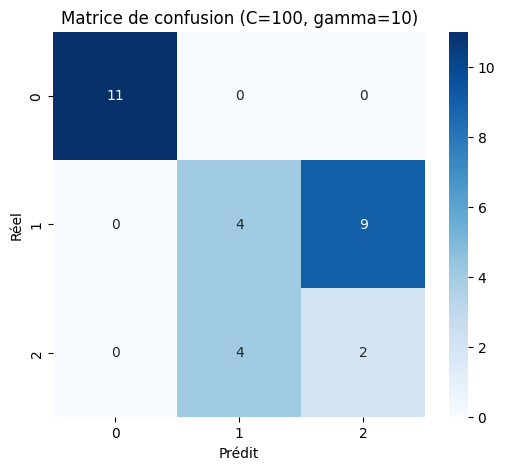

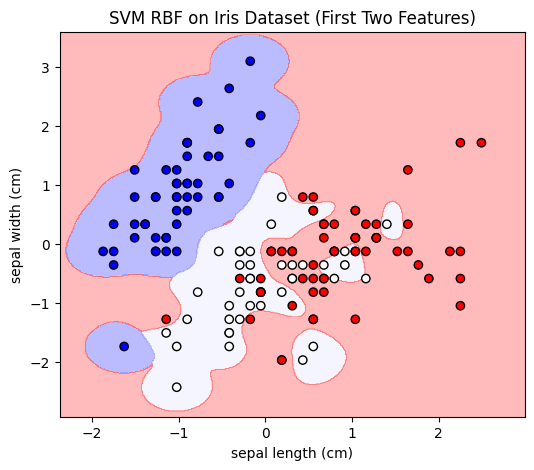

In [9]:
# Définir les valeurs de C et gamma à tester
parametres_C = [0.1, 1, 10, 100]
parametres_gamma = [0.01, 0.1, 1, 10]

# Boucle sur les combinaisons de paramètres
for C in parametres_C:
    for gamma in parametres_gamma:
        print(f"Test avec C={C}, gamma={gamma}")
        
        # Créer et entraîner le modèle
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        
        # Prédictions
        y_pred = svm.predict(X_test)
        
        # Calcul de la matrice de confusion
        cm = confusion_matrix(y_test, y_pred)
        
        # Afficher la matrice de confusion
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Prédit')
        plt.ylabel('Réel')
        plt.title(f'Matrice de confusion (C={C}, gamma={gamma})')
        plt.show()
        
        # Afficher la frontière de décision
        afficher_frontiere_decision(X, y, svm, iris.feature_names[:2])

## Conclusion

A travers ces différents tests, on peut voir visuellement que l'on peut rendre l'algorithme plus ou moins efficace, voir trop efficace comme dans le cas avec c=100 et gamma=10.
On peut aussi observer que pour bien différencier les points blancs et rouges, il faut un algorithme assez stricte, mais comme dit juste avant, celà le rendra efficace sur les données d'entrainement, mais très peu fiables sur des données de test.